In [7]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   -------------------------------------- - 286.7/294.9 kB 8.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 6.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualising data
%matplotlib inline
import seaborn as sns

In [11]:
df=pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')
#to avoid encoding error,use 'unicode_escape' to read the file here

In [12]:
df.shape
#we have stored the above file in this data frame now shape is used to tell us the number of rows and columns in the file

(11251, 15)

In [14]:
df.head(5)
#tells us about the columns we have here in the data frame, which inturn shows the top 5 tables that we have

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [15]:
df.info()
#this is a step of data cleaning which gives us the info of the data the columns, rows, details, data type etc WHICH GIVES US WHICH COLUMNS HAVE A PROBLEM

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [17]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)
#used for dropping the columns inplace used to save the changes that are done axis is the whole row aur the column we are talking about

KeyError: "['Status', 'unnamed1'] not found in axis"

In [18]:
df.info()  #to check if the columns we deleted are actually deleted or not


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [19]:
pd.isnull(df)  #checking the null values of the data gives the true and false value jo false values hai woh null nhi hai

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
#final step to check the null values
pd.isnull(df).sum()
#gives the total of the null values 

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [21]:
#deleting the null values 
df.dropna(inplace=True)
#inplace used to save the values other wise the changes wont be saved

In [23]:
df.shape #12 rows kam ho gyi

(11239, 13)

In [24]:
#how to change the data type
df['Amount']=df['Amount'].astype('int')

In [25]:
#to see if the data type has actually changed or not
df['Amount'].dtypes

dtype('int64')

In [26]:
#we are renaming a column in the form of a dictionary key value pair
df.rename(columns={'Marital_Status': 'Shaadi'})  #but this is not saved as we have not used the implace operator

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [28]:
df.describe()
#returns the description of the data in the DataFrame{i.e. count, mean, std, etc}

#to use describe for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


EXPLORATORY DATA ANALYSIS


Gender

In [29]:
df.columns
#to get the names of all the columns which are present here in the jupyter notebook

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

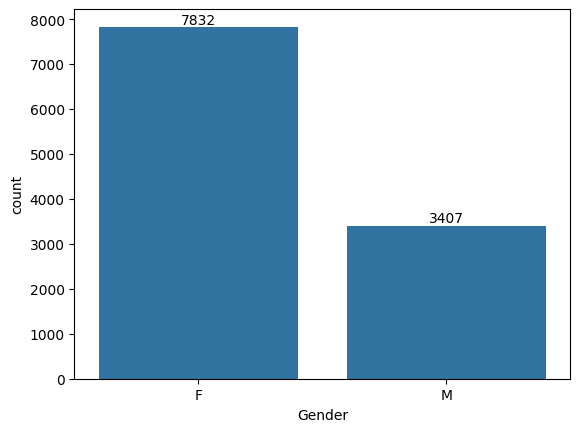

In [31]:
#it basically counts the number of data entries in the form of a bar chart 
ax=sns.countplot(x='Gender' ,data=df)
#agar sirf yehi run karenge toh bhi plot aayega but humari values nhi aayengi


for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

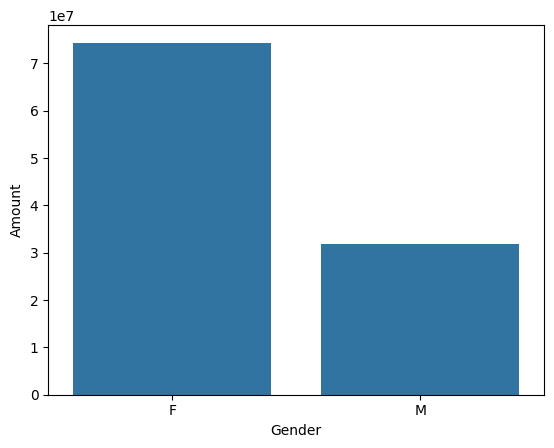

In [36]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
#group by gender column basis summing the column and sort it on the basis of amount they have spent in total in descending order


#let us store this amount somewhere and then plot it
sales_gen=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

#plotting the data
sns.barplot(x='Gender',y='Amount' ,data=sales_gen)

From the above graph we can see that most of the buyers are females and even the purchasing power of females is more then men

AGE


In [37]:
df.columns



Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

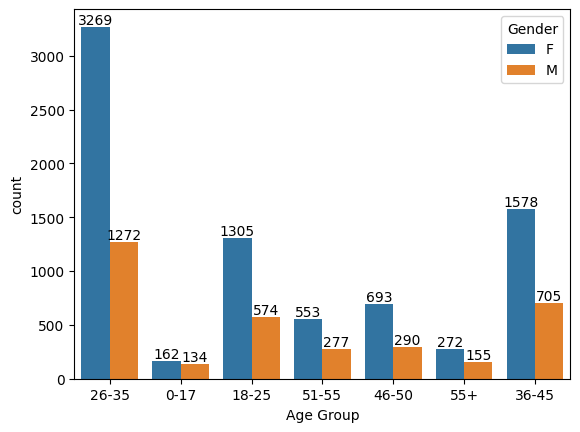

In [39]:
ax=sns.countplot(data=df, x='Age Group', hue='Gender')
#if hue is removed, then the gender wala distinction is removed

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

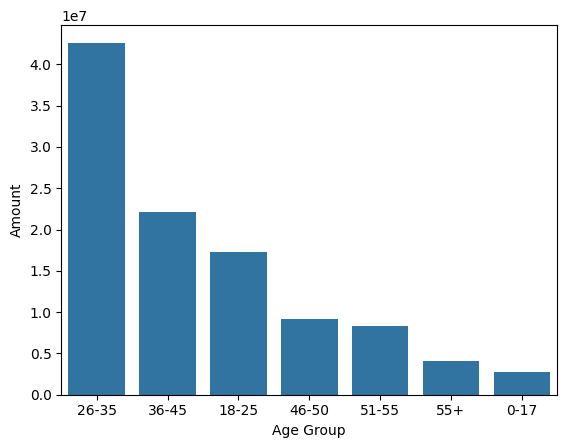

In [40]:
sales_age=df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount' ,ascending=False)
sns.barplot(x='Age Group',y= 'Amount', data=sales_age)

From above graphs we can see that most of the buyers are of the age group between 26-35 yrs female

State


In [41]:
df.columns


Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

C:\Users\riyas\AppData\Local\Temp\ipykernel_39364\4231665427.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_state, x='State' ,y='Orders', palette="muted")


<Axes: xlabel='State', ylabel='Orders'>

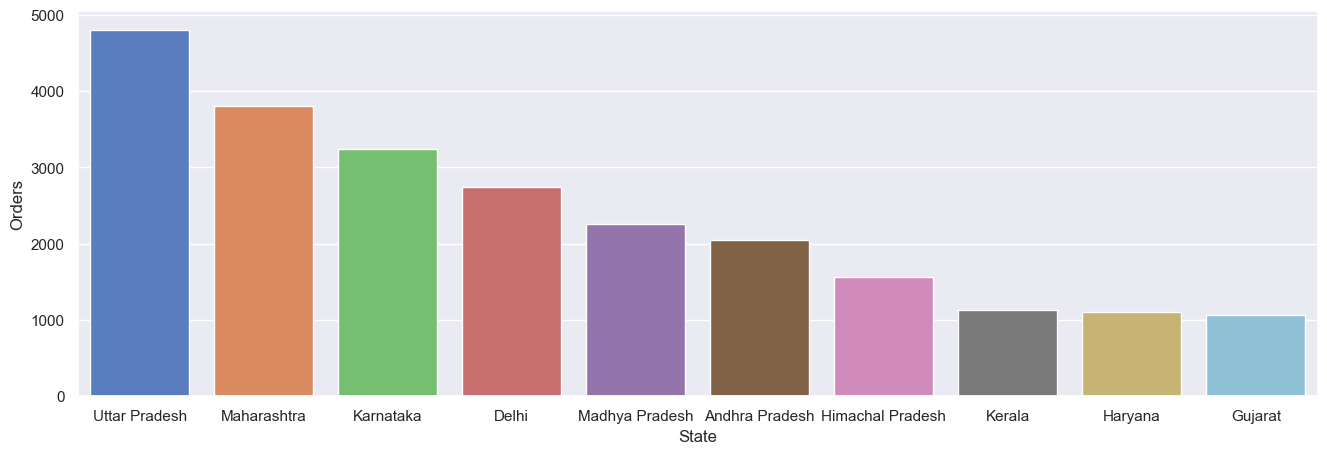

In [50]:
#here we are finding the total number of orders from top 10 states
sales_state=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data=sales_state, x='State' ,y='Orders', palette="muted")

C:\Users\riyas\AppData\Local\Temp\ipykernel_39364\3502547914.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_state, x='State', y='Amount', palette='muted')


<Axes: xlabel='State', ylabel='Amount'>

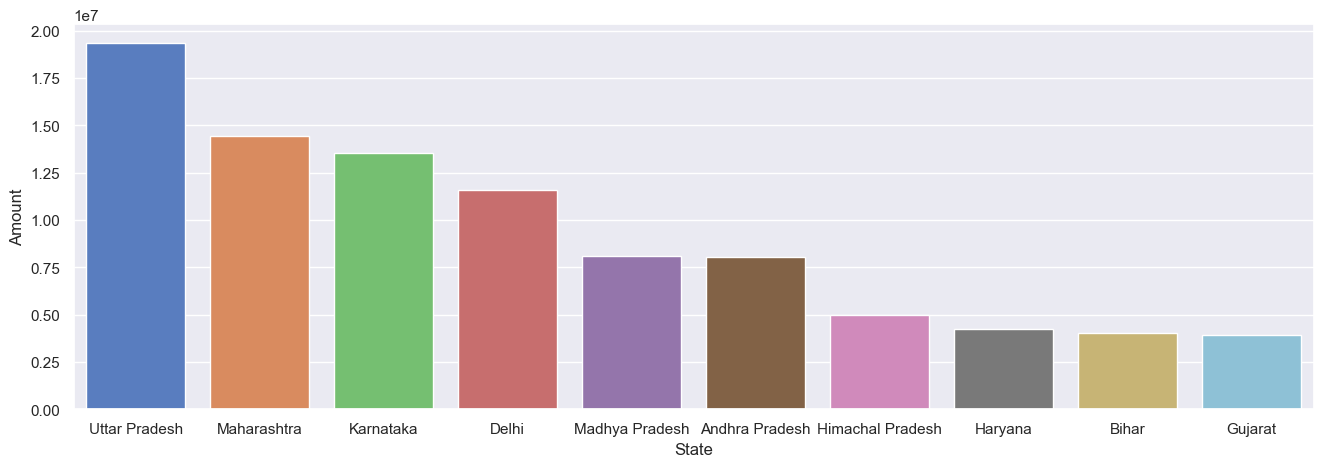

In [54]:
#total amount/sales from top 10 states

sales_state=df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data=sales_state, x='State', y='Amount', palette='muted')

From the above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

Marital Status

C:\Users\riyas\AppData\Local\Temp\ipykernel_39364\1485315526.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='Marital_Status',palette='muted')


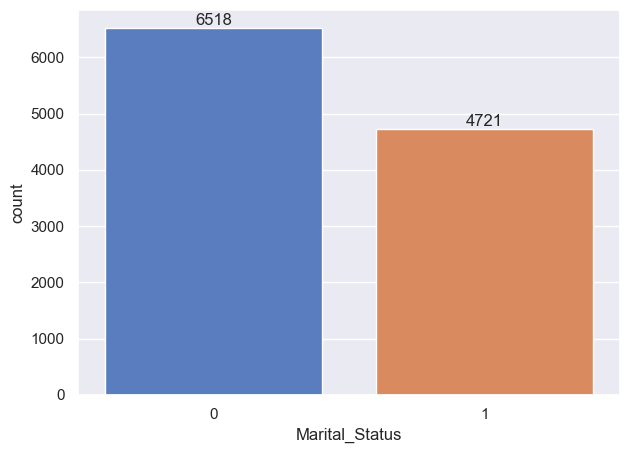

In [60]:
ax=sns.countplot(data=df, x='Marital_Status',palette='muted')
sns.set(rc={'figure.figsize':(7,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

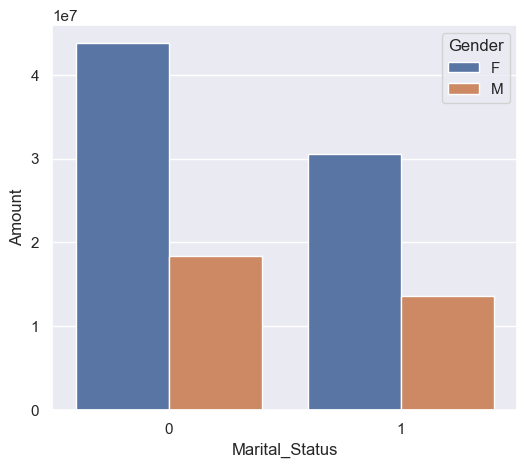

In [62]:
sales_state=df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data=sales_state, x='Marital_Status',y='Amount' ,hue='Gender')

From the above graphs we can see that most of the buyers are married(women) and have high purchasing power

Occupation

C:\Users\riyas\AppData\Local\Temp\ipykernel_39364\2211995404.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='Occupation', palette='muted')


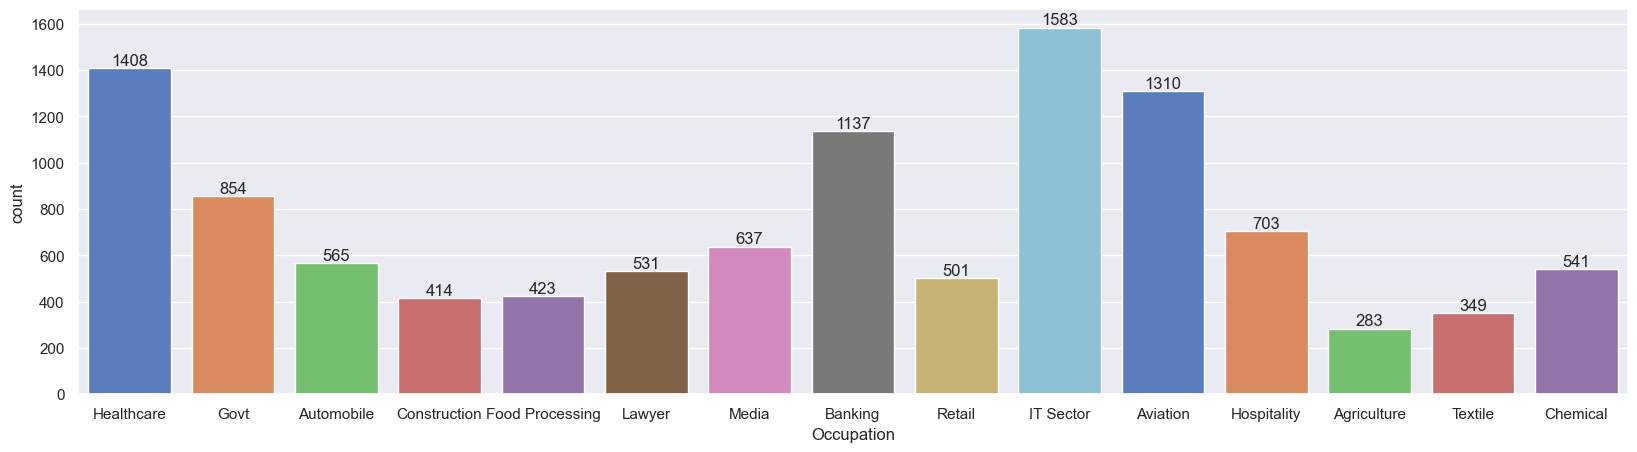

In [66]:
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(data=df, x='Occupation', palette='muted')

for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\riyas\AppData\Local\Temp\ipykernel_39364\2640378380.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_state, x='Occupation', y='Amount', palette='muted')


<Axes: xlabel='Occupation', ylabel='Amount'>

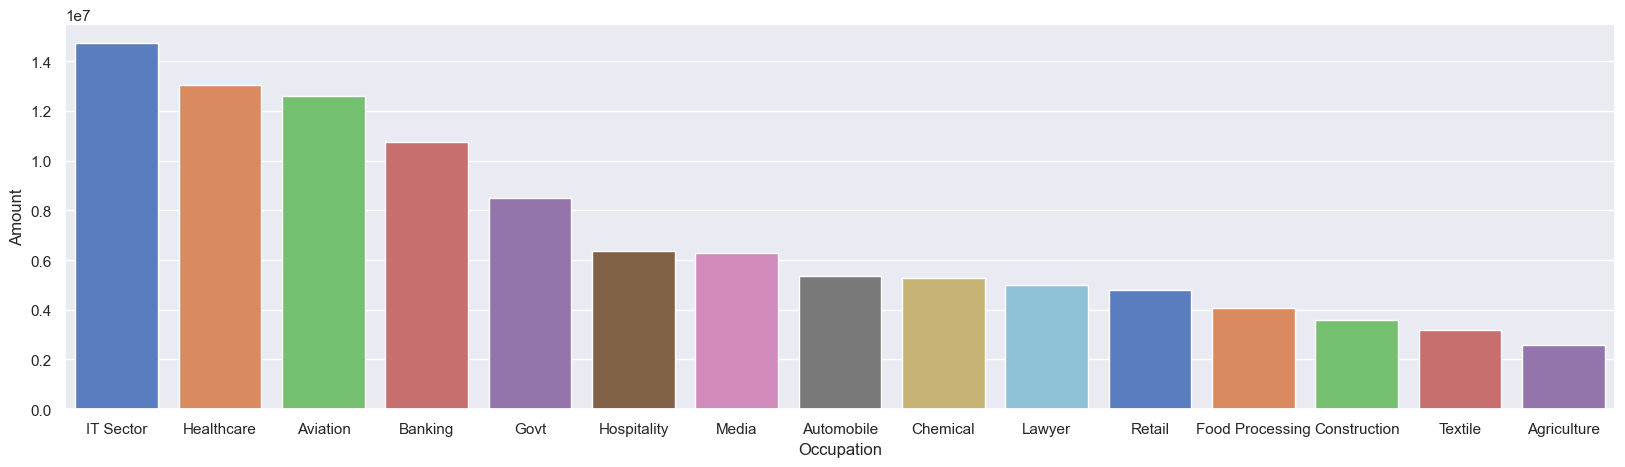

In [67]:
sales_state=df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x='Occupation', y='Amount', palette='muted')

From the above graphs we can see that most of the buyers are working in the IT,Healthcare and Aviation sector

Product Category

C:\Users\riyas\AppData\Local\Temp\ipykernel_39364\1652915103.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='Product_Category', palette='muted')


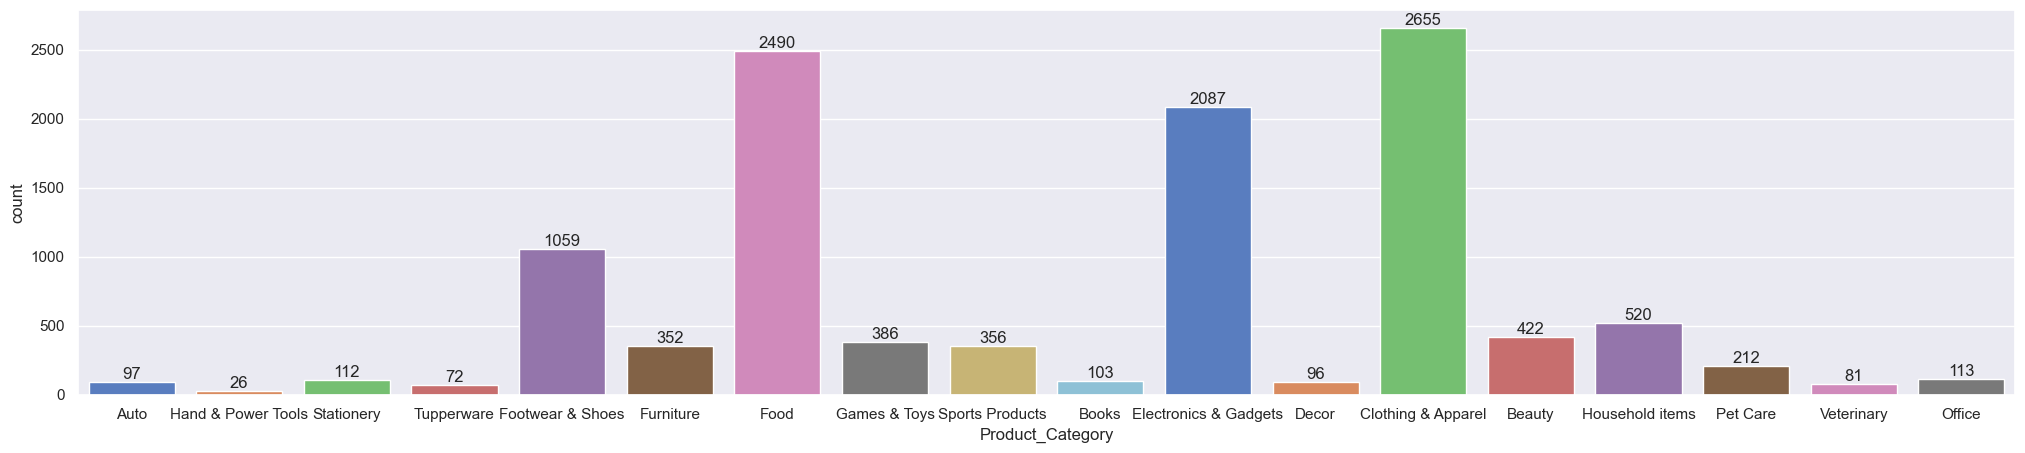

In [74]:
sns.set(rc={'figure.figsize':(25,5)})
ax=sns.countplot(data=df, x='Product_Category', palette='muted')

for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\riyas\AppData\Local\Temp\ipykernel_39364\4232164484.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_state, x = 'Product_Category',y= 'Amount', palette='muted')


<Axes: xlabel='Product_Category', ylabel='Amount'>

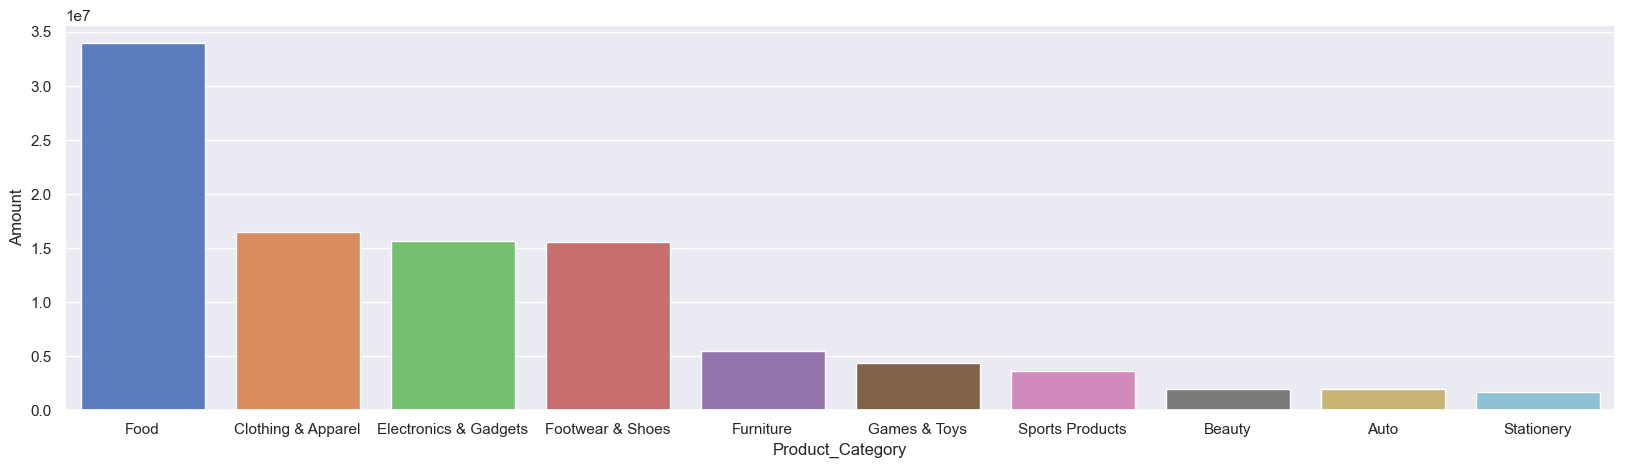

In [78]:
sales_state=df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x = 'Product_Category',y= 'Amount', palette='muted')
                                                                                         

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

C:\Users\riyas\AppData\Local\Temp\ipykernel_39364\771834842.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders', palette='muted')


<Axes: xlabel='Product_ID', ylabel='Orders'>

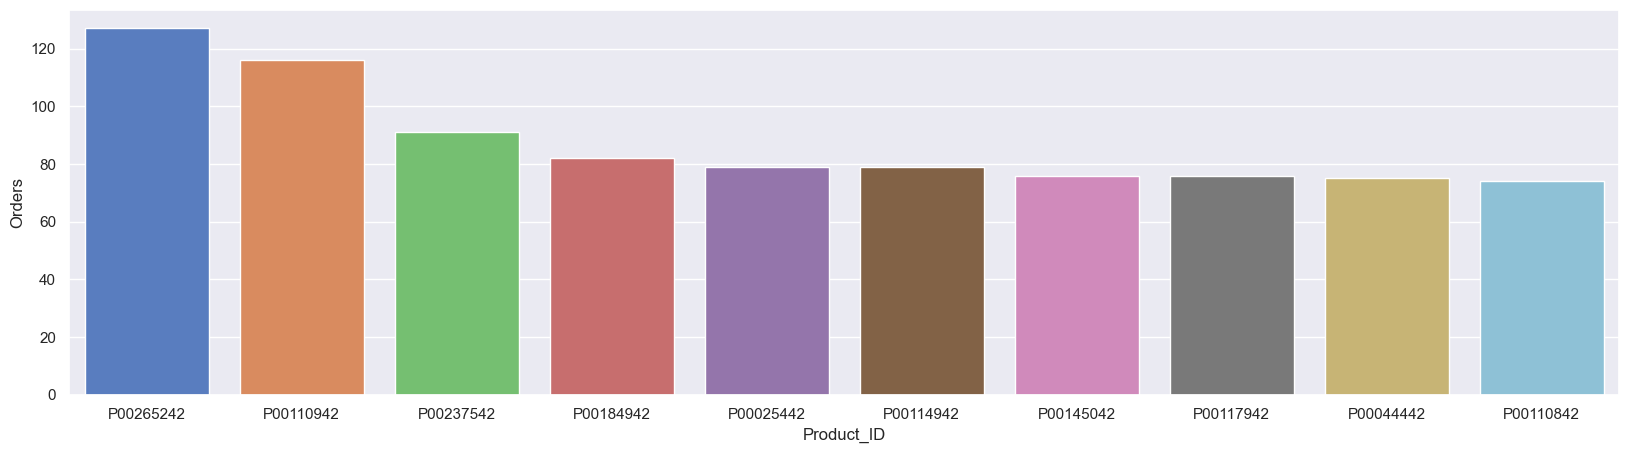

In [79]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders', palette='muted')

<Axes: xlabel='Product_ID'>

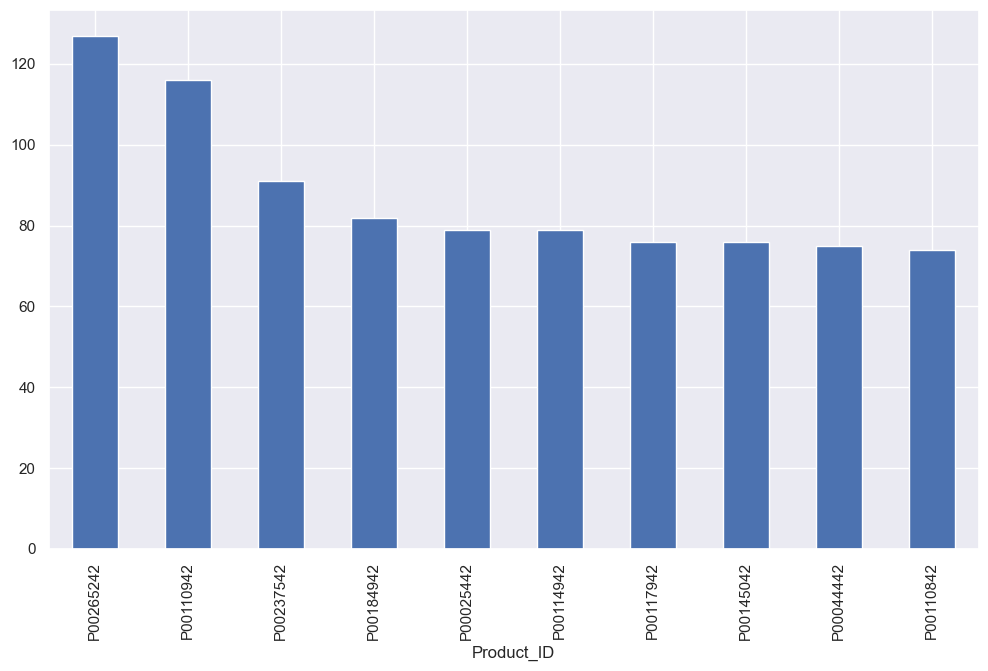

In [80]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

Conclusion


Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category